In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split
import numpy
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [2]:
texts = fetch_20newsgroups(subset='all')
print 'Totics:',texts.target_names
print 'Totics num:', len(texts.target_names)
print 'Total files:', len(texts.data)

Totics: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
Totics num: 20
Total files: 18846


#TF-IDF vectorization

In [3]:
tfidf = TfidfVectorizer(stop_words='english')
transformed_data = tfidf.fit_transform(texts.data)

#SVD

In [4]:
svd = TruncatedSVD(n_components=20)
transformed_svd = svd.fit_transform(transformed_data)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(transformed_svd, texts.target, test_size = 0.3)

print("Train data: {}".format(len(X_train)))
print("Test data: {}".format(len(X_test)))

Train data: 13192
Test data: 5654


#K_NN

In [6]:
knn_classifier = KNeighborsClassifier().fit(X_train, y_train)

y_train_predict = knn_classifier.predict(X_train)
y_test_predict = knn_classifier.predict(X_test)

print("*******Errors*******")
print("Train data: {}".format(numpy.mean(y_train != y_train_predict)))
print("Test data: {}".format(numpy.mean(y_test  != y_test_predict)))

*******Errors*******
Train data: 0.235294117647
Test data: 0.347541563495


# AdaBoost

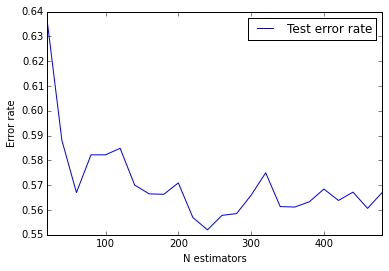

In [9]:
from sklearn import ensemble
import numpy as np
import matplotlib.pyplot as plt

#кол-во деревьев
estimators = range(20,500,20)

AB_test = []

for i in estimators:  
    rf = ensemble.AdaBoostClassifier(n_estimators = i).fit(X_train, y_train)
    err_test  = np.mean(y_test  != rf.predict(X_test))
    #сохраняем значения oob и err_test
    AB_test.append(err_test)

plt.plot(estimators, AB_test, label="Test error rate")

plt.xlim(min(estimators), max(estimators))
plt.xlabel("N estimators")
plt.ylabel("Error rate")
plt.legend(loc="upper right")
plt.show()

In [13]:
for id, component in enumerate(svd.components_):
    print("{} category, specific words:".format(id+1))
    w_len = numpy.argsort(component)
    print(np.asarray(tfidf.get_feature_names())[w_len[-5:-1]][:])

1 category, specific words:
[u'people' u'article' u'writes' u'com']
2 category, specific words:
[u'believe' u'bible' u'jesus' u'people']
3 category, specific words:
[u'team' u'cs' u'game' u'university']
4 category, specific words:
[u'drive' u'jesus' u'scsi' u'windows']
5 category, specific words:
[u'games' u'team' u'ca' u'game']
6 category, specific words:
[u'sgi' u'sandvik' u'stratus' u'edu']
7 category, specific words:
[u'chip' u'god' u'encryption' u'clipper']
8 category, specific words:
[u'state' u'ohio' u'ide' u'drive']
9 category, specific words:
[u'gov' u'henry' u'space' u'nasa']
10 category, specific words:
[u'god' u'cdt' u'sw' u'windows']
11 category, specific words:
[u'acs' u'cramer' u'state' u'magnus']
12 category, specific words:
[u'turkish' u'armenians' u'apple' u'armenian']
13 category, specific words:
[u'banks' u'gordon' u'geb' u'pitt']
14 category, specific words:
[u'virginia' u'jake' u'jews' u'israeli']
15 category, specific words:
[u'digex' u'windows' u'optilink' u'acc